# Visualization for Publication

Answering the following research questions:

* How is the increase of the density of the public fast-charging infrastructure network affecting the adoption of battery-eletric vehicles in different income classes?
* Is there a spill-over effect of local public charging infrastructure investments on the adoption of battery-electric passenger 

In [8]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [9]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e


In [10]:
def read_data(case_study_name, input_file_name):
    current_path = os.getcwd()
    print("Current path:", current_path)
    file_results = os.path.normpath(current_path + "/results")
    print("File results:", os.path.normpath(file_results))
    file_path = os.path.join(current_path, "/results")
    print(file_path)
    # Normalize the path
    normalized_path = os.path.normpath(file_path)
    print("Normalized path:", normalized_path)

    # reading input data 
    folder_input = os.path.normpath(current_path + "/data")
    with open(folder_input + "/" + input_file_name) as file:
        input_data = yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
    #     n_fueling_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
        budget_penalty_minus_dict = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
        budget_penalty_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
        budget_penalty_plus_yearly_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
        budget_penalty_minus_yearly_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
    #     detour_time_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
        f_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
        h_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
        h_exist_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
        h_minus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
        h_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
        q_fuel_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
        q_mode_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
        s_dict= yaml.safe_load(file)
    
    budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
    budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
    #  detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
    f = {process_key(key): process_value(value) for key, value in f_dict.items()}
    h = {process_key(key): process_value(value) for key, value in h_dict.items()}
    h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
    h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
    h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
    q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
    q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
    s = {process_key(key): process_value(value) for key, value in s_dict.items()}
    # n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}
    detour_time = {}
    n_fueling = {}
    output_data = {"budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus, "detour_time": detour_time, "f": f, "h": h, "h_exist": h_exist, "h_minus": h_minus, "h_plus": h_plus, "q_fuel_infr_plus": q_fuel_infr_plus, "q_mode_infr_plus": q_mode_infr_plus, "s": s, "n_fueling": n_fueling}

    return input_data, output_data
    


## Plotting detour time 

In [11]:
case_studies = ["cs_2025-03-12_18-28-31", "cs_2025-03-12_17-20-00"]
input_file_name = "transport_data_years_v83_slow_densification.yaml"
case_study_output = {}
case_study_input = {}
for cs in case_studies:
    input_data, output_data = read_data(cs, input_file_name)
    case_study_output[cs] = output_data
    case_study_input[cs] = input_data


Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [32]:
detour_times_at_edge = {}
infrastructure_expansion = {}
fueled_energy = {}
fueled_other_energy = {}
stock_of_fueling_there = {}
load_factor = {}
mode_shift = {}
total_h_fs_allfuels = {}
total_h_fs = {}
total_h_fs_share = {}
modal_shift_split_fs = {}

model_parameters = input_data["Model"]
gamma = model_parameters["gamma"]
Y = model_parameters["Y"]
investment_period = model_parameters["investment_period"]
# investment_period = 1
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]
product_list = input_data["Product"]
odpair_list = input_data["Odpair"]
path_list = input_data["Path"]
techvehicle_list = input_data["TechVehicle"]
fuel_list = input_data["Fuel"]
geometric_element_list = input_data["GeographicElement"]
technology_list = input_data["Technology"]
mode_list = input_data["Mode"]
financial_status = input_data["FinancialStatus"]


odpair_list_dict = {item["id"]: item for item in odpair_list}
techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
product_list_dict = {item["id"]: item for item in product_list}
path_list_dict = {item["id"]: item for item in path_list}
fuel_list_dict = {item["id"]: item for item in fuel_list}
geometric_element_list_dict = {item["id"]: item for item in geometric_element_list}
technology_list_dict = {item["id"]: item for item in technology_list}
mode_list_dict = {item["id"]: item for item in mode_list}
financial_status_dict = {item["id"]: item for item in financial_status}

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1
Y_disp = 2040
geom_id = 12
fuel_id = 2
for cs in case_studies:
    detour_time = case_study_output[cs]["detour_time"]
    n_fueling = case_study_output[cs]["n_fueling"]
    q_fuel_infr_plus = case_study_output[cs]["q_fuel_infr_plus"]
    h = case_study_output[cs]["h"]
    s = case_study_output[cs]["s"]
    f = case_study_output[cs]["f"]
    for y in range(y_init, Y_end + 1):
        detour_times_sum = sum([detour_time[(y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id) in detour_time.keys()])    
        n_fueling_sum = sum([n_fueling[(y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id) in n_fueling.keys()])    
        if n_fueling_sum > 0:
            detour_times_at_edge[(cs, y, fuel_id)] = detour_times_sum/n_fueling_sum
        else:
            detour_times_at_edge[(cs, y, fuel_id)] = 0
        
        q_fuel_infr_plus_sum = sum(q_fuel_infr_plus[(y0, fuel_id, geom_id)] for y0 in np.arange(y_init, y+1, investment_period) if (y0, fuel_id, geom_id) in q_fuel_infr_plus.keys())
        infrastructure_expansion[(cs, y)] = q_fuel_infr_plus_sum

        total_s_sum = sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"]])
        fueled_energy[(cs, y)] = total_s_sum
        total_s_sum_other = sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] != fuel_list_dict[fuel_id]["name"]])
        fueled_other_energy[(cs, y)] = total_s_sum_other

        total_h = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"]])
        stock_of_fueling_there[(cs, y)] = total_h
        if q_fuel_infr_plus_sum > 0:
            load_factor[(cs, y)] = total_s_sum/(q_fuel_infr_plus_sum * 365 * 24) * 100
        else:
            load_factor[(cs, y)] = 0

        for m in mode_list_dict.keys():
            f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            mode_shift[(cs, y, m)] = f_pkm
        
        if y == Y_disp:
            for fs in financial_status_dict.keys():
                fs_name = financial_status_dict[fs]["name"]
                f_pkm_total = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) for m in mode_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
                f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])

                if f_pkm_total > 0:
                    modal_shift_split_fs[(cs, y, fs)] = (f_pkm/f_pkm_total) * 100
                else:
                    modal_shift_split_fs[(cs, y, fs)] = 0

        for fs in financial_status_dict.keys():
            fs_name = financial_status_dict[fs]["name"]
            sum_h_fs = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"] and fs_name == odpair_list_dict[r]["financial_status"]])
            sum_h_fs_allfuels = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and fs_name == odpair_list_dict[r]["financial_status"]])
            total_h_fs[(cs, y, fs)] = sum_h_fs
            total_h_fs_allfuels[(cs, y, fs)] = sum_h_fs_allfuels
            if y == Y_disp:
                if sum_h_fs_allfuels > 0:
                    total_h_fs_share[(cs, y, fs)] = sum_h_fs/sum_h_fs_allfuels * 100
                else:
                    total_h_fs_share[(cs, y, fs)] = 0

print(detour_times_at_edge)
print(infrastructure_expansion)
print(fueled_energy)
print(fueled_other_energy)
print(stock_of_fueling_there)
print(mode_shift)
print(load_factor)
print(total_h_fs)
print(total_h_fs_allfuels)
print(total_h_fs_share)
print(modal_shift_split_fs)

{('cs_2025-03-12_18-28-31', 2020, 2): 0, ('cs_2025-03-12_18-28-31', 2021, 2): 0, ('cs_2025-03-12_18-28-31', 2022, 2): 0, ('cs_2025-03-12_18-28-31', 2023, 2): 0, ('cs_2025-03-12_18-28-31', 2024, 2): 0, ('cs_2025-03-12_18-28-31', 2025, 2): 0, ('cs_2025-03-12_18-28-31', 2026, 2): 0, ('cs_2025-03-12_18-28-31', 2027, 2): 0, ('cs_2025-03-12_18-28-31', 2028, 2): 0, ('cs_2025-03-12_18-28-31', 2029, 2): 0, ('cs_2025-03-12_18-28-31', 2030, 2): 0, ('cs_2025-03-12_18-28-31', 2031, 2): 0, ('cs_2025-03-12_18-28-31', 2032, 2): 0, ('cs_2025-03-12_18-28-31', 2033, 2): 0, ('cs_2025-03-12_18-28-31', 2034, 2): 0, ('cs_2025-03-12_18-28-31', 2035, 2): 0, ('cs_2025-03-12_18-28-31', 2036, 2): 0, ('cs_2025-03-12_18-28-31', 2037, 2): 0, ('cs_2025-03-12_18-28-31', 2038, 2): 0, ('cs_2025-03-12_18-28-31', 2039, 2): 0, ('cs_2025-03-12_18-28-31', 2040, 2): 0, ('cs_2025-03-12_18-28-31', 2041, 2): 0, ('cs_2025-03-12_18-28-31', 2042, 2): 0, ('cs_2025-03-12_18-28-31', 2043, 2): 0, ('cs_2025-03-12_18-28-31', 2044, 2): 0,

## Plots

```python

```



{('cs_2025-03-12_18-28-31', 2020, 2): 0, ('cs_2025-03-12_18-28-31', 2021, 2): 0, ('cs_2025-03-12_18-28-31', 2022, 2): 0, ('cs_2025-03-12_18-28-31', 2023, 2): 0, ('cs_2025-03-12_18-28-31', 2024, 2): 0, ('cs_2025-03-12_18-28-31', 2025, 2): 0, ('cs_2025-03-12_18-28-31', 2026, 2): 0, ('cs_2025-03-12_18-28-31', 2027, 2): 0, ('cs_2025-03-12_18-28-31', 2028, 2): 0, ('cs_2025-03-12_18-28-31', 2029, 2): 0, ('cs_2025-03-12_18-28-31', 2030, 2): 0, ('cs_2025-03-12_18-28-31', 2031, 2): 0, ('cs_2025-03-12_18-28-31', 2032, 2): 0, ('cs_2025-03-12_18-28-31', 2033, 2): 0, ('cs_2025-03-12_18-28-31', 2034, 2): 0, ('cs_2025-03-12_18-28-31', 2035, 2): 0, ('cs_2025-03-12_18-28-31', 2036, 2): 0, ('cs_2025-03-12_18-28-31', 2037, 2): 0, ('cs_2025-03-12_18-28-31', 2038, 2): 0, ('cs_2025-03-12_18-28-31', 2039, 2): 0, ('cs_2025-03-12_18-28-31', 2040, 2): 0, ('cs_2025-03-12_18-28-31', 2041, 2): 0, ('cs_2025-03-12_18-28-31', 2042, 2): 0, ('cs_2025-03-12_18-28-31', 2043, 2): 0, ('cs_2025-03-12_18-28-31', 2044, 2): 0,

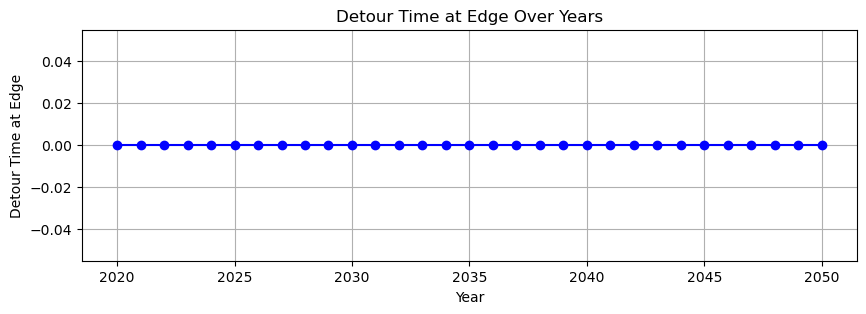

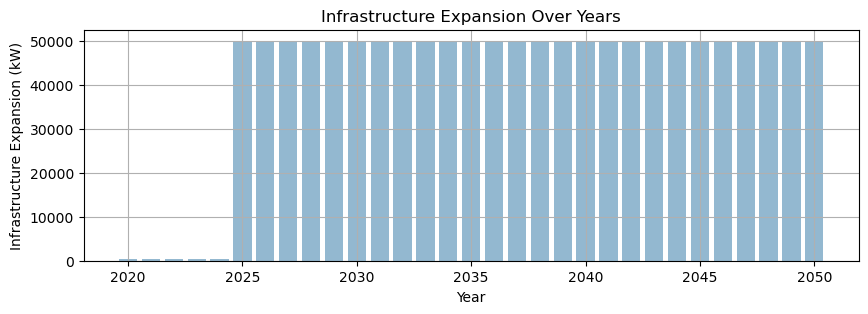

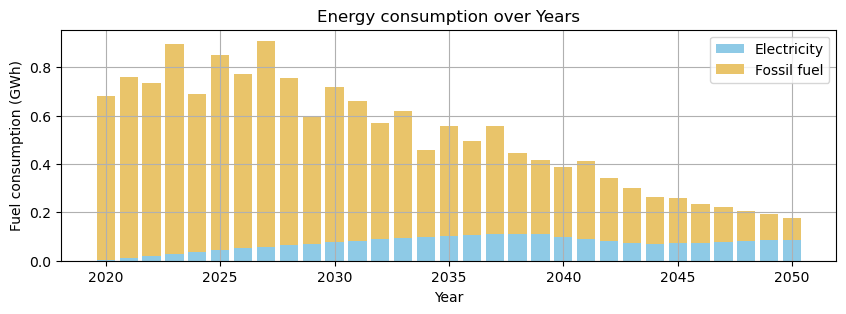

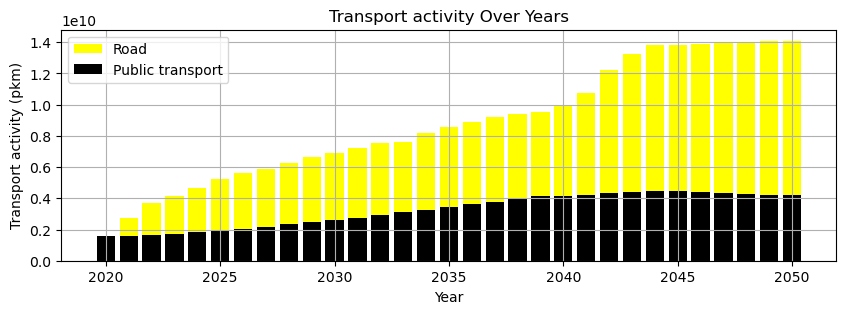

{('cs_2025-03-12_18-28-31', 2040, 0): 61.14117111811128, ('cs_2025-03-12_18-28-31', 2040, 1): 60.302293073639014, ('cs_2025-03-12_18-28-31', 2040, 2): 61.394436537711826, ('cs_2025-03-12_18-28-31', 2040, 3): 55.42889305122342, ('cs_2025-03-12_18-28-31', 2040, 4): 48.10165898515809, ('cs_2025-03-12_18-28-31', 2040, 5): 51.66874259109758}


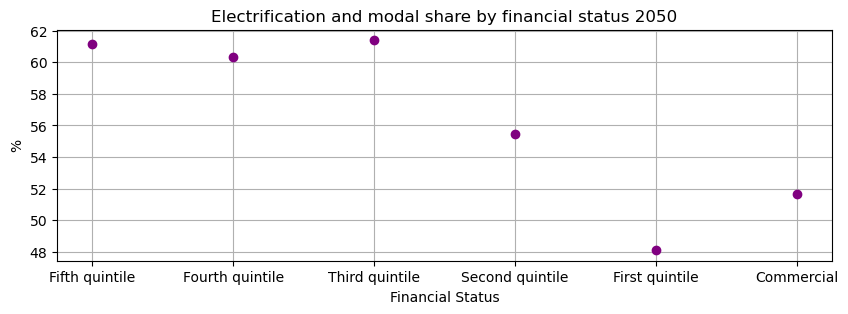

{('cs_2025-03-12_18-28-31', 2020, 2): 0, ('cs_2025-03-12_18-28-31', 2021, 2): 0, ('cs_2025-03-12_18-28-31', 2022, 2): 0, ('cs_2025-03-12_18-28-31', 2023, 2): 0, ('cs_2025-03-12_18-28-31', 2024, 2): 0, ('cs_2025-03-12_18-28-31', 2025, 2): 0, ('cs_2025-03-12_18-28-31', 2026, 2): 0, ('cs_2025-03-12_18-28-31', 2027, 2): 0, ('cs_2025-03-12_18-28-31', 2028, 2): 0, ('cs_2025-03-12_18-28-31', 2029, 2): 0, ('cs_2025-03-12_18-28-31', 2030, 2): 0, ('cs_2025-03-12_18-28-31', 2031, 2): 0, ('cs_2025-03-12_18-28-31', 2032, 2): 0, ('cs_2025-03-12_18-28-31', 2033, 2): 0, ('cs_2025-03-12_18-28-31', 2034, 2): 0, ('cs_2025-03-12_18-28-31', 2035, 2): 0, ('cs_2025-03-12_18-28-31', 2036, 2): 0, ('cs_2025-03-12_18-28-31', 2037, 2): 0, ('cs_2025-03-12_18-28-31', 2038, 2): 0, ('cs_2025-03-12_18-28-31', 2039, 2): 0, ('cs_2025-03-12_18-28-31', 2040, 2): 0, ('cs_2025-03-12_18-28-31', 2041, 2): 0, ('cs_2025-03-12_18-28-31', 2042, 2): 0, ('cs_2025-03-12_18-28-31', 2043, 2): 0, ('cs_2025-03-12_18-28-31', 2044, 2): 0,

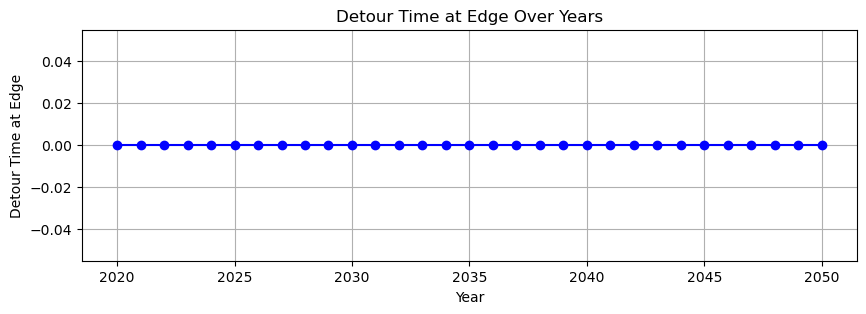

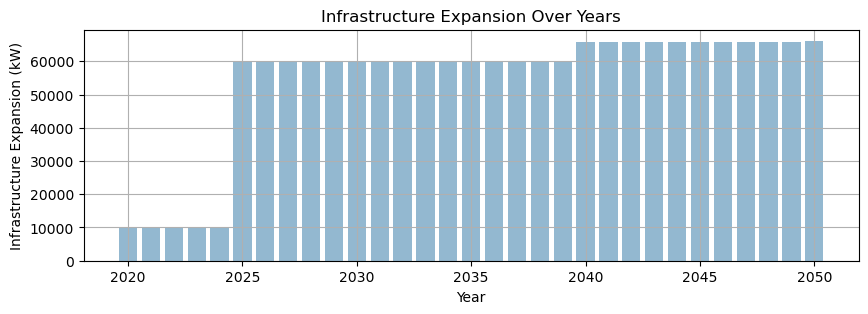

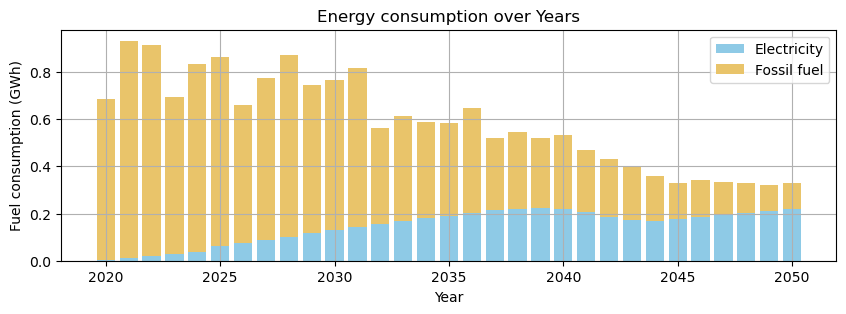

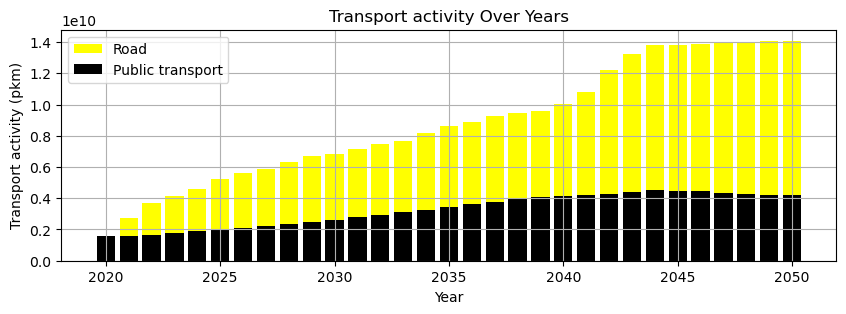

{('cs_2025-03-12_17-20-00', 2040, 0): 61.2274781776233, ('cs_2025-03-12_17-20-00', 2040, 1): 61.8521238248522, ('cs_2025-03-12_17-20-00', 2040, 2): 65.24349911681733, ('cs_2025-03-12_17-20-00', 2040, 3): 56.149671507350554, ('cs_2025-03-12_17-20-00', 2040, 4): 49.06956613763525, ('cs_2025-03-12_17-20-00', 2040, 5): 54.703763269747526}


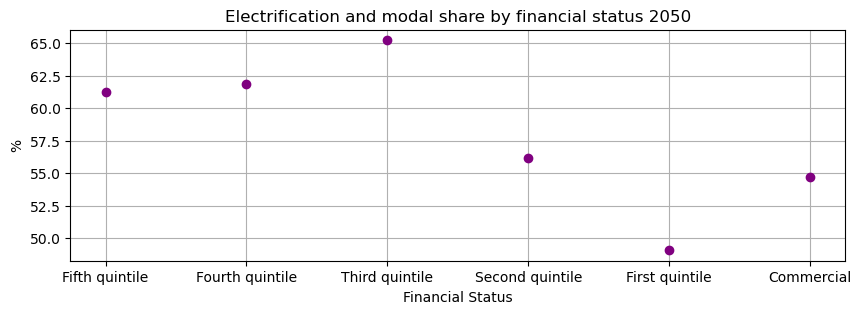

In [ ]:
current_path = os.getcwd()
Y_disp = 2040

file_results = os.path.normpath(current_path + "/results")
for case_study_name in case_studies:
    # case_study_name = case_studies[0]
    years = range(min([item[1] for item in list(detour_times_at_edge.keys())]), max([item[1] for item in list(detour_times_at_edge.keys())]) + 1) 
    
    # detour_times_filtered = [detour_times_at_edge[el] for el in detour_times_at_edge.keys() if el[0] == case_study_name]
    print(detour_times_filtered)
    detour_times_filtered = {k: v for k, v in detour_times_at_edge.items() if k[0] == case_study_name}
    detour_times = list(detour_times_filtered.values())
    print(len(detour_times), len(years))
    plt.figure(figsize=(10, 3))
    plt.plot(years, detour_times, marker='o', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('Detour Time at Edge')
    plt.title('Detour Time at Edge Over Years')
    plt.grid(True)
    plt.show()

    infrastructure_expansion_filtered = {k: v for k, v in infrastructure_expansion.items() if k[0] == case_study_name}
    infrastructure_expansion_values = list(infrastructure_expansion_filtered.values())

    plt.figure(figsize=(10, 3))
    plt.bar(years, infrastructure_expansion_values, color='#669bbc', alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('Infrastructure Expansion (kW)')
    plt.title('Infrastructure Expansion Over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "infr_inv.png"), transparent=True)
    plt.show()


    fueled_energy_filtered = {k: v for k, v in fueled_energy.items() if k[0] == case_study_name}
    fueled_energy_values = [item * 10 ** (-9) for item in list(fueled_energy_filtered.values())]
    fueled_other_energy_filtered = {k: v for k, v in fueled_other_energy.items() if k[0] == case_study_name}
    fueled_other_energy_values = [item * 10 ** (-9) for item in list(fueled_other_energy_filtered.values())]

    plt.figure(figsize=(10, 3))
    plt.bar(years, fueled_energy_values, color='#8ecae6', label='Electricity')
    plt.bar(years, fueled_other_energy_values, bottom=fueled_energy_values, color='#e9c46a', label='Fossil fuel')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Fuel consumption (GWh)')
    plt.title('Energy consumption over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "energ_cons.png"), transparent=True)
    plt.show()

    filtered_mode_shift = {k: v for k, v in mode_shift.items() if k[0] == case_study_name}
    mode_1_values = [mode_shift[key] for key in list(filtered_mode_shift.keys()) if key[2] == 1]
    mode_2_values = [mode_shift[key] for key in list(filtered_mode_shift.keys()) if key[2] == 2]

    plt.figure(figsize=(10, 3))
    plt.bar(years, mode_1_values, color='yellow', label='Road')
    plt.bar(years, mode_2_values, bottom=fueled_energy_values, color='black', label='Public transport')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Transport activity (pkm)')
    plt.title('Transport activity Over Years')
    plt.grid(True)
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "Transport_activity.png"), transparent=True)
    plt.show()

    financial_statuses = [financial_status_dict[fs]["name"] for fs in financial_status_dict.keys()]
    total_h_fs_share_filtered = {k: v for k, v in total_h_fs_share.items() if k[0] == case_study_name and k[1] == Y_disp}
    print(total_h_fs_share_filtered)
    total_h_fs_share_values = [total_h_fs_share_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    modal_shift_split_fs_filtered = {k: v for k, v in modal_shift_split_fs.items() if k[0] == case_study_name and k[1] == Y_disp}
    modal_shift_split_fs_values = [modal_shift_split_fs_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    plt.figure(figsize=(10, 3))
    plt.grid(True, zorder=0)
    plt.scatter(financial_statuses, total_h_fs_share_values, color='purple', zorder=3, label='Battery-electric vehicles (%)')
    # plt.scatter(financial_statuses, modal_shift_split_fs_values, color='orange', zorder=3, label='Modal Share Road (%)')
    plt.xlabel('Financial Status')
    plt.ylabel('%')
    plt.title('Electrification and modal share by financial status ' + str(Y_disp))
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "elect_mode.png"), transparent=True)

    plt.show()



{('cs_2025-03-12_18-28-31', 2040, 0): 61.14117111811128, ('cs_2025-03-12_18-28-31', 2040, 1): 60.302293073639014, ('cs_2025-03-12_18-28-31', 2040, 2): 61.394436537711826, ('cs_2025-03-12_18-28-31', 2040, 3): 55.42889305122342, ('cs_2025-03-12_18-28-31', 2040, 4): 48.10165898515809, ('cs_2025-03-12_18-28-31', 2040, 5): 51.66874259109758}
{('cs_2025-03-12_17-20-00', 2040, 0): 61.2274781776233, ('cs_2025-03-12_17-20-00', 2040, 1): 61.8521238248522, ('cs_2025-03-12_17-20-00', 2040, 2): 65.24349911681733, ('cs_2025-03-12_17-20-00', 2040, 3): 56.149671507350554, ('cs_2025-03-12_17-20-00', 2040, 4): 49.06956613763525, ('cs_2025-03-12_17-20-00', 2040, 5): 54.703763269747526}


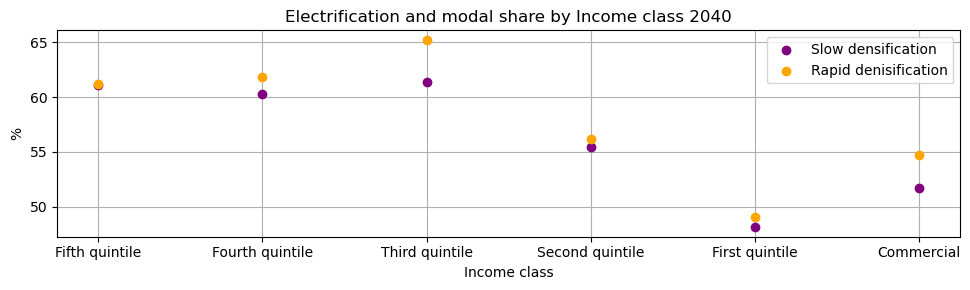

In [40]:
colors={'cs_2025-03-12_18-28-31':'purple', 'cs_2025-03-12_17-20-00':'orange'}
lables={'cs_2025-03-12_18-28-31':'Slow densification', 'cs_2025-03-12_17-20-00':'Rapid denisification'}
plt.figure(figsize=(10, 3))
plt.grid(True, zorder=0)
for case_study_name in case_studies:
    # case_study_name = case_studies[0]
    years = range(min([item[1] for item in list(detour_times_at_edge.keys())]), max([item[1] for item in list(detour_times_at_edge.keys())]) + 1) 
    financial_statuses = [financial_status_dict[fs]["name"] for fs in financial_status_dict.keys()]
    total_h_fs_share_filtered = {k: v for k, v in total_h_fs_share.items() if k[0] == case_study_name and k[1] == Y_disp}
    print(total_h_fs_share_filtered)
    total_h_fs_share_values = [total_h_fs_share_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    modal_shift_split_fs_filtered = {k: v for k, v in modal_shift_split_fs.items() if k[0] == case_study_name and k[1] == Y_disp}
    modal_shift_split_fs_values = [modal_shift_split_fs_filtered[(case_study_name, Y_disp, fs)] for fs in financial_status_dict.keys()]

    
    plt.scatter(financial_statuses, total_h_fs_share_values, color=colors[case_study_name], zorder=3, label=lables[case_study_name])
    # plt.scatter(financial_statuses, modal_shift_split_fs_values, color='orange', zorder=3, label='Modal Share Road (%)')
plt.xlabel('Income class')
plt.ylabel('%')
plt.legend()
plt.title('Electrification and modal share by Income class ' + str(Y_disp))
plt.tight_layout()
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "elect_mode.png"), transparent=True)

plt.show()


In [101]:
# calculate co2 emissions
fuel_list_dict_name = {item["name"]: item for item in fuel_list}
def co2_emissions(case_study_name):
    co2_emissions_dic = {}
    s = case_study_output[case_study_name]["s"]
    for y in range(y_init, Y_end + 1):
        co2_emissions_dic[y] = 0
        for r in odpair_list_dict.keys():
            for tv_id in techvehicle_list_dict.keys():
                for g in range(g_init, y + 1):
                    if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"]:
                        co2_emissions_dic[y] += sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] * fuel_list_dict_name[technology_list_dict[technology_list_dict[techvehicle_list_dict[tv]["technology"]]["id"]]["fuel"]]["emission_factor"][y-y_init] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] == fuel_list_dict[1]["name"]])
    return co2_emissions_dic
    

In [102]:
co2_emissions_yearly = {}
for case_study_name in case_studies:
    co2_emissions_yearly[case_study_name] = co2_emissions(case_study_name)


In [103]:
# costs for infrastructure

def infrastructure_costs(case_study_name):
    fueling_inf_costs = {}
    om_costs = fuel_list_dict[fuel_id]["fueling_infrastructure_om_costs"]
    inv_costs = fuel_list_dict[fuel_id]["cost_per_kW"]
    q_fuel_infr_plus = case_study_output[cs]["q_fuel_infr_plus"]
    total_check = 0
    for y in range(y_init, Y_end + 1):
        q_fuel_infr_plus_added_since_0 = sum(q_fuel_infr_plus[(y0, fuel_id, geom_id)] for y0 in np.arange(y_init, y+1, investment_period) if (y0, fuel_id, geom_id) in q_fuel_infr_plus.keys())
        if y == Y_end:
            total_check += q_fuel_infr_plus_added_since_0
        if y in range(y_init, Y_end + 1, investment_period):
            q_fuel_infr_plus_added_y = q_fuel_infr_plus[(y, fuel_id, geom_id)]
        else: 
            q_fuel_infr_plus_added_y = 0
        costs = q_fuel_infr_plus_added_since_0 * om_costs[y-y_init] + q_fuel_infr_plus_added_y * inv_costs[y-y_init]
        fueling_inf_costs[y] = costs
        print(total_check)
        # print("total end charging infrastructure costs", costs)
    return costs



In [104]:
fuel_infrastructure_costs = {}

for case_study_name in case_studies:
    fuel_infrastructure_costs[case_study_name] = infrastructure_costs(case_study_name)

print(fuel_infrastructure_costs)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
66192.927111
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
66192.927111
{'cs_2025-03-12_18-28-31': 6724870.18975, 'cs_2025-03-12_17-20-00': 6724870.18975}


In [105]:
lables={'cs_2025-03-12_18-28-31':'Slow densification', 'cs_2025-03-12_17-20-00':'Rapid denisification'}

In [106]:
print(co2_emissions_yearly)


{'cs_2025-03-12_18-28-31': {2020: 1433747689410455.5, 2021: 1636242159393429.8, 2022: 1626504607207977.2, 2023: 2038013185535774.8, 2024: 1589955065660321.0, 2025: 2024652193190805.8, 2026: 1870540472729263.2, 2027: 2279310249614691.0, 2028: 1911142784919191.8, 2029: 1500502824874101.2, 2030: 1868956227321486.8, 2031: 1726139413499742.5, 2032: 1478188477309800.0, 2033: 1653432781446323.5, 2034: 1169138334231046.2, 2035: 1504842617722257.0, 2036: 1311331623451073.5, 2037: 1559446041317245.8, 2038: 1196724747703464.5, 2039: 1115403804903341.2, 2040: 1080589033903417.4, 2041: 1230306682685558.8, 2042: 1014086415677944.5, 2043: 899909881585353.1, 2044: 786212126468910.2, 2045: 773054794540044.8, 2046: 668802866034742.4, 2047: 611009869867734.2, 2048: 551351382672362.0, 2049: 490470505765734.75, 2050: 405583050865384.4}, 'cs_2025-03-12_17-20-00': {2020: 1432736596057977.5, 2021: 2016185822276401.8, 2022: 2028919503298663.2, 2023: 1557653814270483.5, 2024: 1937500266906815.2, 2025: 201095387

In [ ]:
# define a base case scenario 